### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

### Data Gathering

In [2]:
df = pd.read_csv("advertising.csv")
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### EDA

In [3]:
data=df
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: xlabel='Sales', ylabel='count'>

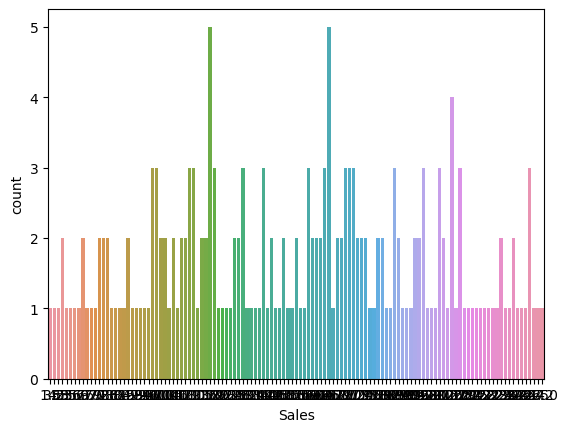

In [7]:
data["Sales"].value_counts()
sns.countplot(x="Sales",data=data)

### Linearity

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

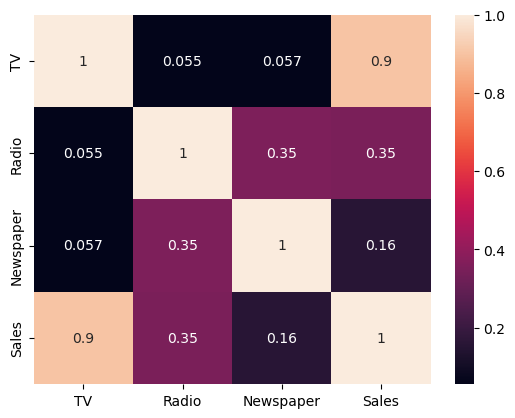

In [9]:
sns.heatmap(data.corr(), annot=True)

<Axes: >

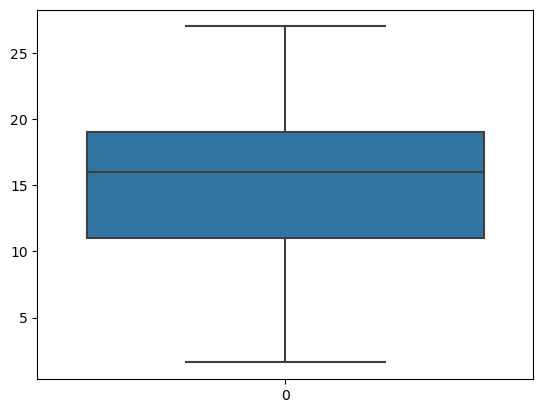

In [10]:
sns.boxplot(data["Sales"])

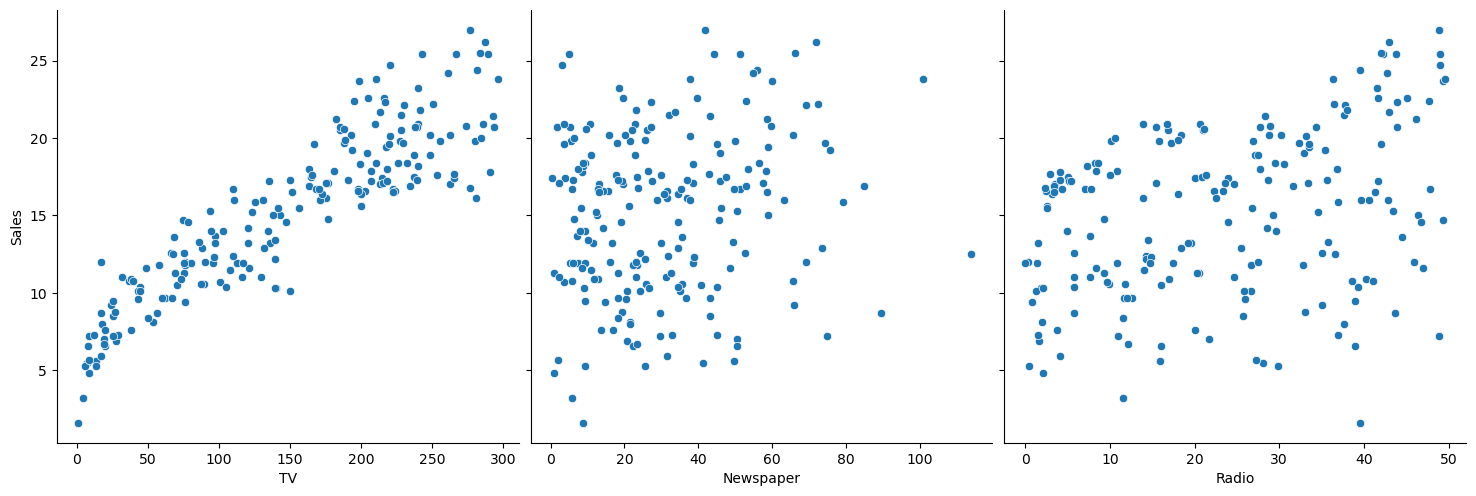

In [11]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')

In [12]:
x = data.drop("Sales", axis=1)
y =  data["Sales"]

### Linear Regression 

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2, random_state=42)
print("Shape", x_train.shape)
print("Shape", x_test.shape)

Shape (40, 3)
Shape (160, 3)


In [14]:
x_train.head(5)

,TV,Radio,Newspaper
175,276.9,48.9,41.8
134,36.9,38.6,65.6
167,206.8,5.2,19.4
183,287.6,43.0,71.8
63,102.7,29.6,8.4


In [15]:
y_train.head(5)

175    27.0
134    10.8
167    17.2
183    26.2
63     14.0
Name: Sales, dtype: float64

In [16]:
linear_reg= LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

### Model evalution 

In [17]:
y_pred =linear_reg.predict(x_test)
y_pred[0:10]

array([17.32102034, 20.76952621, 24.42176613,  8.84760332, 21.54945944,
       12.49128592, 21.23492319,  8.18546594, 17.38225926, 16.77724474])

In [18]:
y_test[0:10]

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
Name: Sales, dtype: float64

In [19]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_test,y_pred)
print("R Squared Value : ",r_squared)


Mean Squared Error : 2.8633847518364854

Root Mean Squared Error : 1.6921538794791937

Mean Absolute Error : 1.3095587464110348

R Squared Value :  0.895132063806193


In [20]:
y_pred_train  = linear_reg.predict(x_train)
len(y_pred_train)
y_pred_train[:5]

array([25.47370542, 10.81698104, 16.74737721, 26.00853776, 12.8625552 ])

In [31]:
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Squared Error :",mse)
print()

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)
print()

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error :",mae)
print()

r_squared = r2_score(y_train,y_pred_train)
print("R Squared Value : ",r_squared)

Mean Squared Error : 3.255043252519563

Root Mean Squared Error : 1.8041738421004676

Mean Absolute Error : 1.3096340223400411

R Squared Value :  0.8897402599573554
